In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style('whitegrid')

In [2]:
df_training = pd.read_csv("twitter_training.csv")
df_training

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df_training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df_validation = pd.read_csv("twitter_validation.csv")

In [5]:
df_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
df_training.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [7]:
df_training.duplicated().sum()

2700

In [8]:
df_validation.isna().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [9]:
df_validation.duplicated().sum()

0

In [10]:
df_training['Positive'].value_counts()

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [11]:
df_validation['Irrelevant'].value_counts()

Irrelevant
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

In [12]:
df_train_clean= df_training.drop_duplicates()

In [13]:
df_train_clean.duplicated().sum()

0

In [14]:
df_train_clean = df_train_clean.dropna(subset=[df_training.columns[3]])
df_train_clean.isna().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

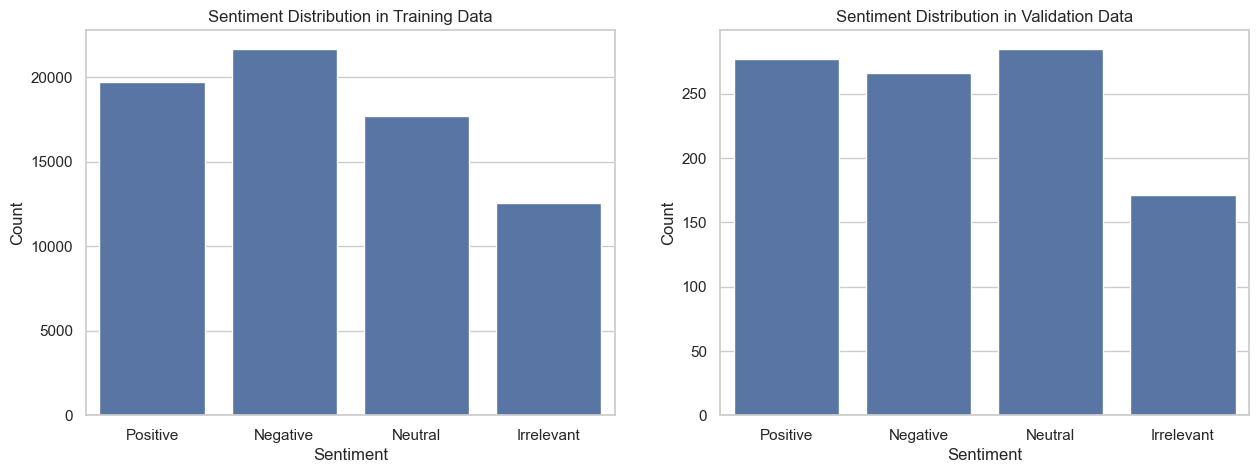

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data

sns.countplot(data = df_train_clean , x = 'Positive' ,order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0] )
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data

sns.countplot(data = df_validation , x = 'Irrelevant' , order=['Positive', 'Negative', 'Neutral', 'Irrelevant'] , ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')


plt.show()


In [16]:
df_train_clean['Borderlands'].value_counts()

Borderlands
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                

C:\Users\Abdo\AppData\Local\Temp\ipykernel_2924\1011969027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_train_clean , y = 'Borderlands' , order = df_train_clean['Borderlands'].value_counts().index,


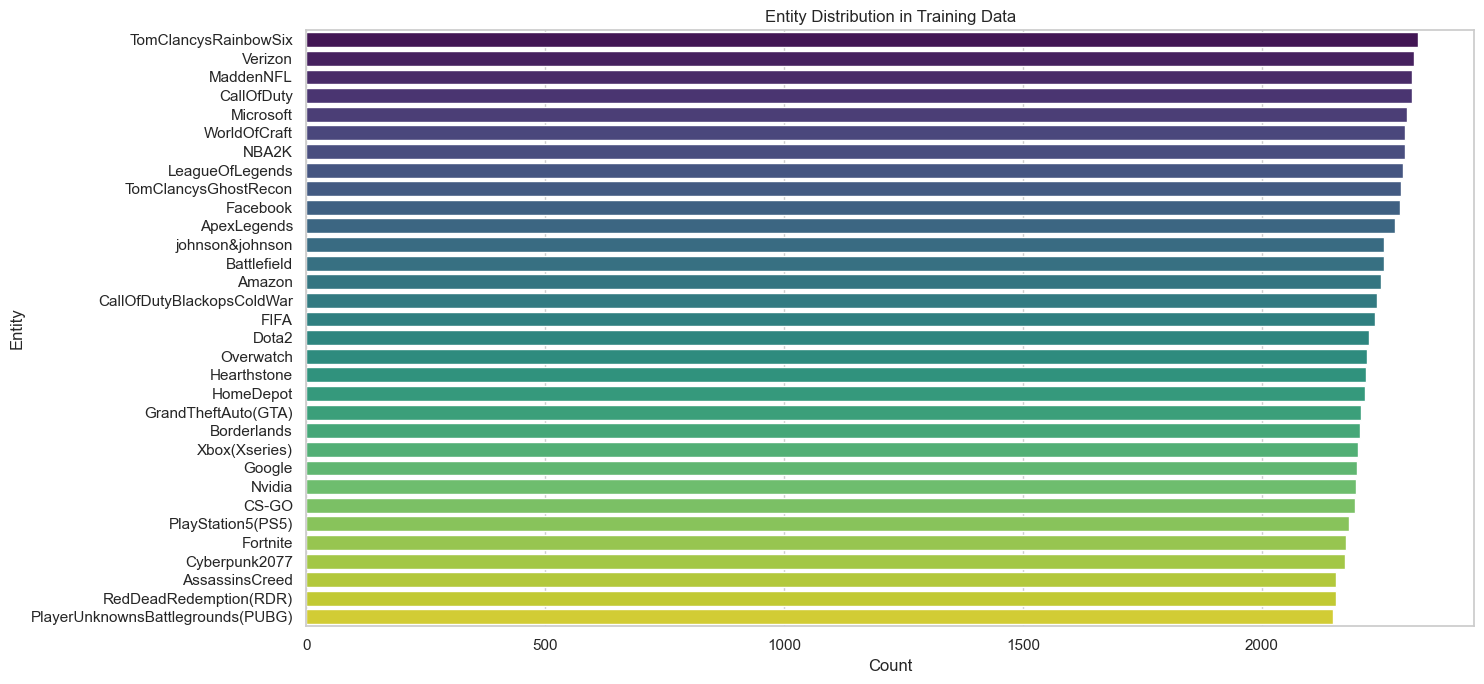

In [17]:
plt.figure(figsize=(15,7))
# Plot entity distribution for training data

sns.countplot(data = df_train_clean , y = 'Borderlands' , order = df_train_clean['Borderlands'].value_counts().index, 
    palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()
    

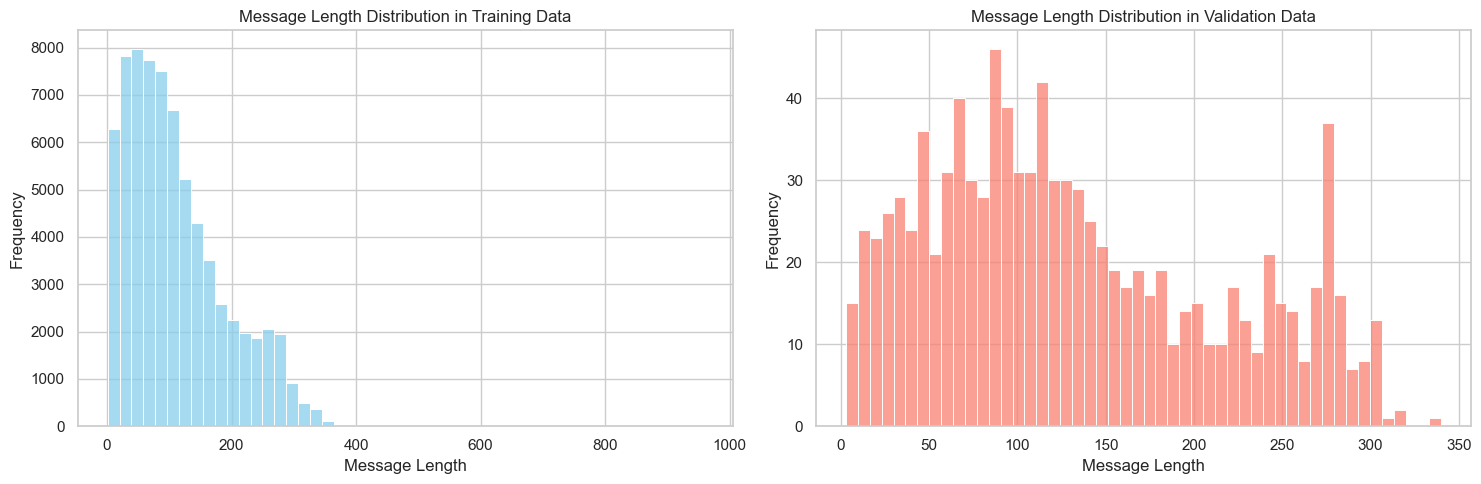

In [18]:
# Calculate the length of each message

df_train_clean ['message_length'] = df_train_clean[df_train_clean.columns[3]].apply(len)
df_validation ['message_length'] = df_validation[df_validation.columns[3]].apply(len)

# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_train_clean['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(df_validation['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()


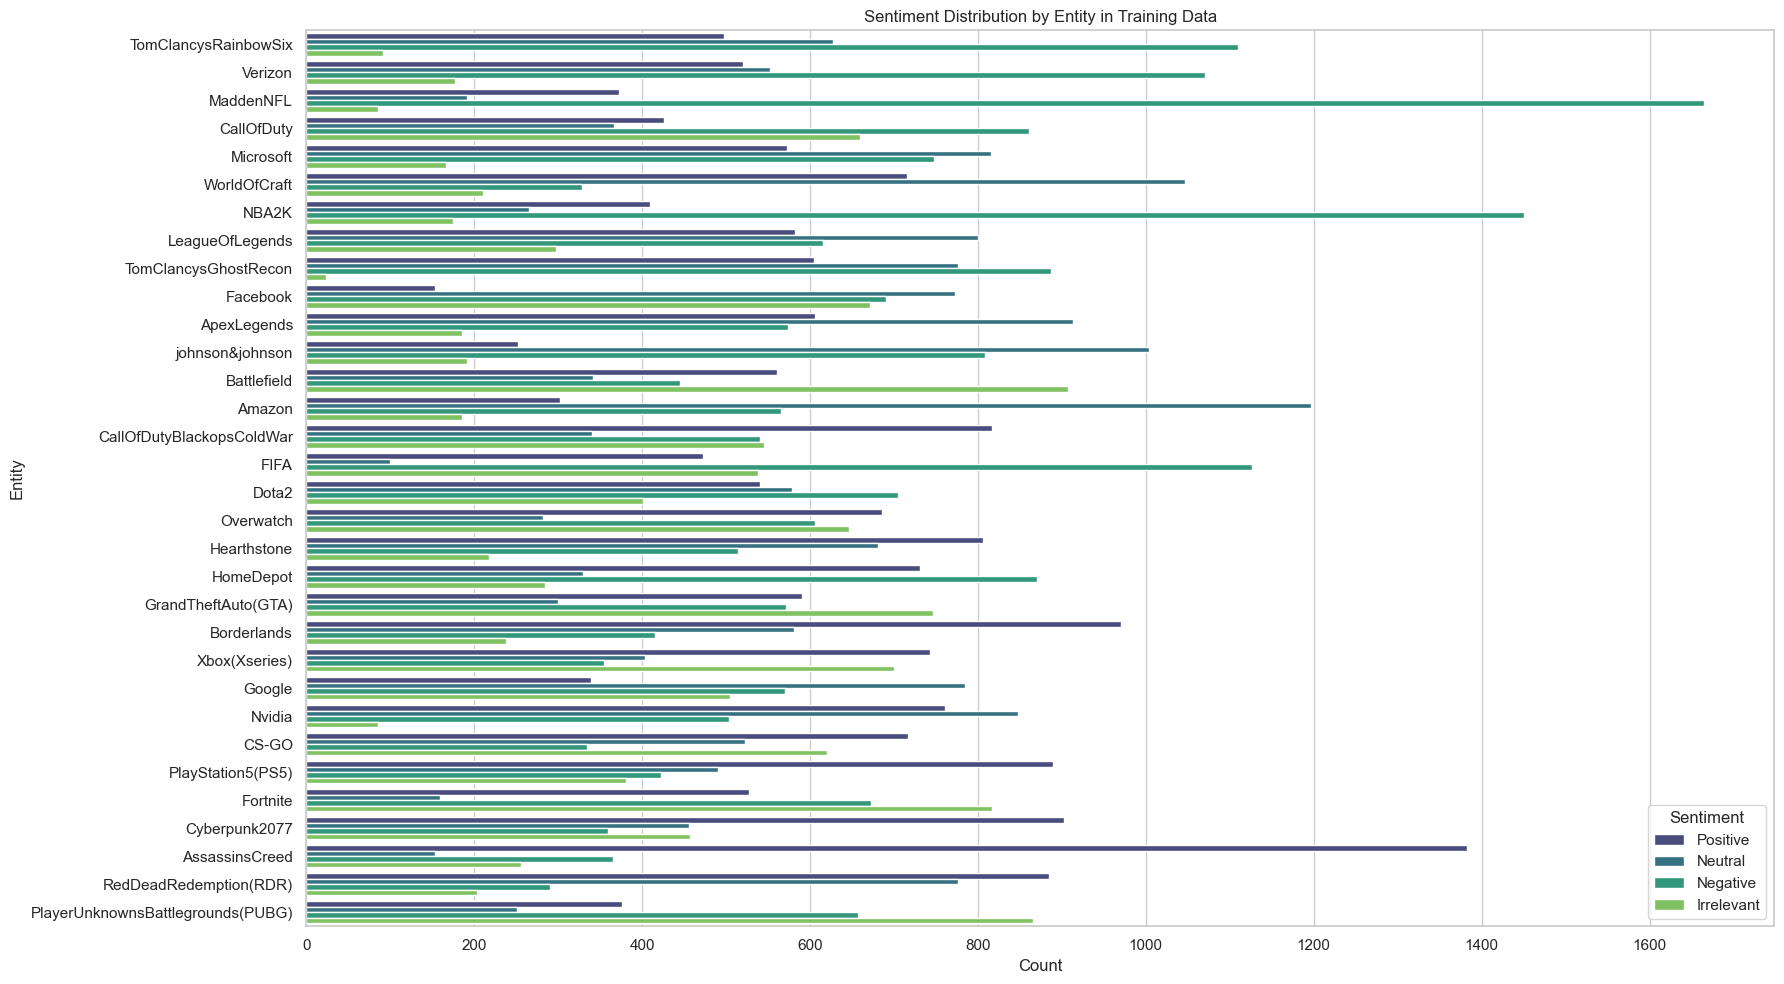

In [19]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=df_train_clean, y=df_train_clean.columns[1], hue=df_train_clean.columns[2], 
              order=df_train_clean[df_train_clean.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_2924\1751179319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_clean, x=df_train_clean.columns[2], y='message_length',
C:\Users\Abdo\AppData\Local\Temp\ipykernel_2924\1751179319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_validation, x=df_validation.columns[2], y='message_length',


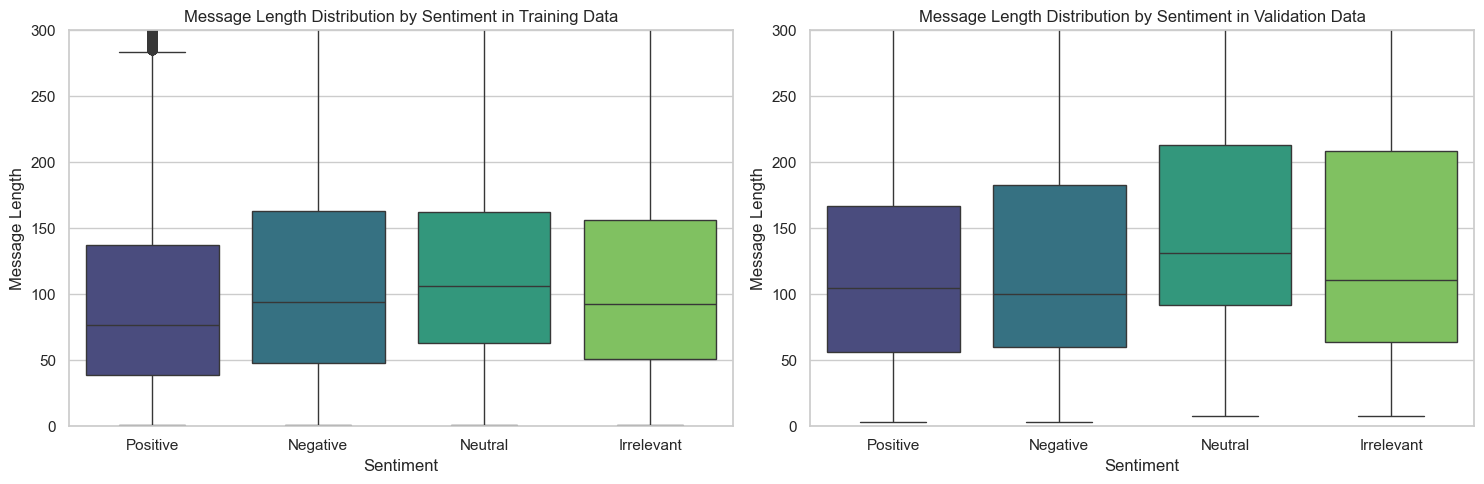

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=df_train_clean, x=df_train_clean.columns[2], y='message_length',
            ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)  


# Plot message length distribution by sentiment for validation data
sns.boxplot(data=df_validation, x=df_validation.columns[2], y='message_length',
            ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)  


plt.tight_layout()
plt.show()

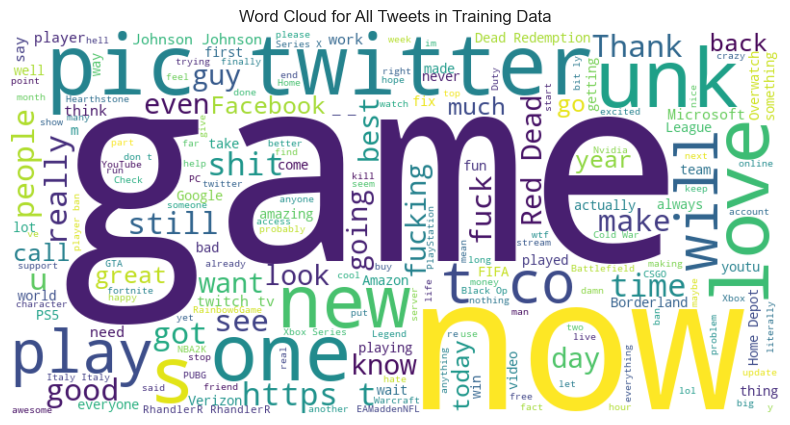

In [21]:
from wordcloud import WordCloud
# Generate the word cloud for the entire training dataset
all_text = " ".join(tweet for tweet in df_train_clean[df_train_clean.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

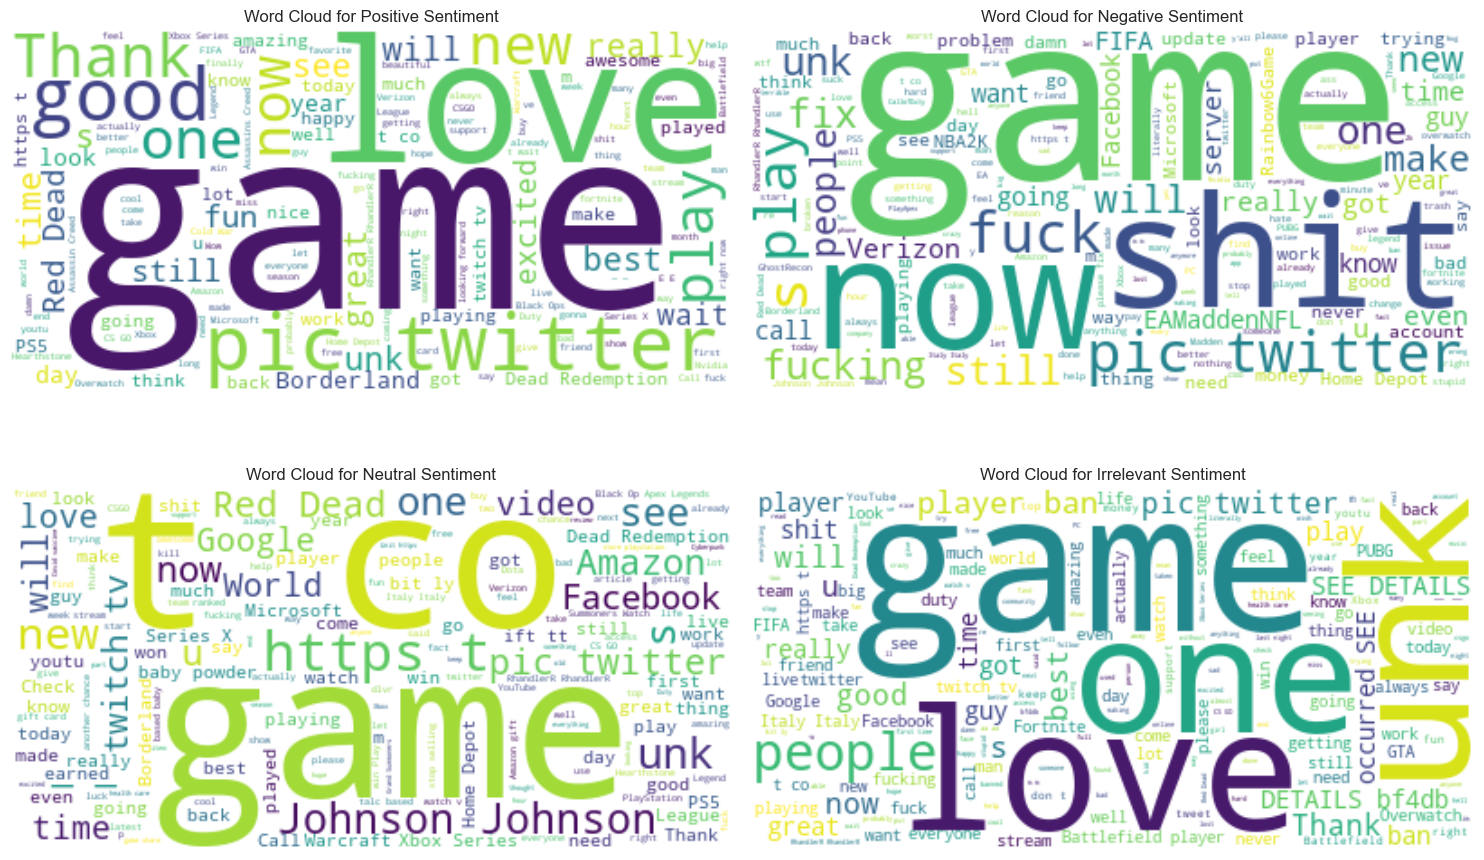

In [22]:
# Initialize sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Generate and plot word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in df_train_clean[df_train_clean[df_train_clean.columns[2]] == sentiment][df_train_clean.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)
    
    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()